In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from math import log10
from sympy.solvers import solve
from sympy import Symbol


Data = pd.read_csv('Dados-medicos.csv',delim_whitespace=True, usecols =[0,1,2,3], header=0)
Data.columns= ['Idade', "Peso", "Carga Final", "VO2 maximo"]
Color = ["Blue","Green", "Red", "Purple"]

In [ ]:
k = Symbol('k')
weibull_k = solve((np.sum((Data["Idade"]**k)*np.log(Data["Idade"]))/np.sum(Data["Idade"]**k))-(1/k)-((1/Data["Idade"].count())*np.sum(np.log(Data["Idade"]))),k)
print(weibull_k)

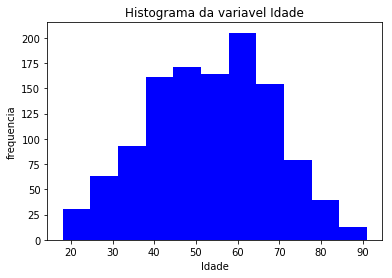

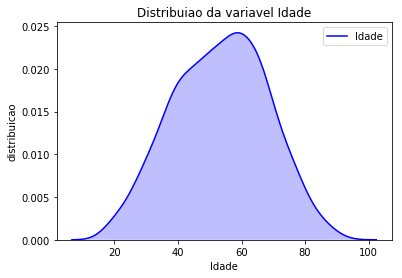

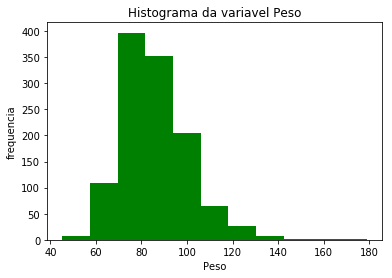

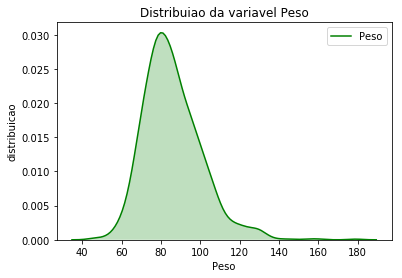

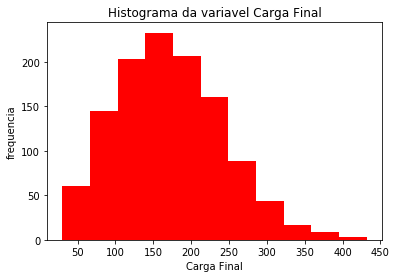

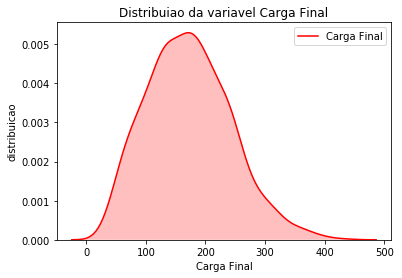

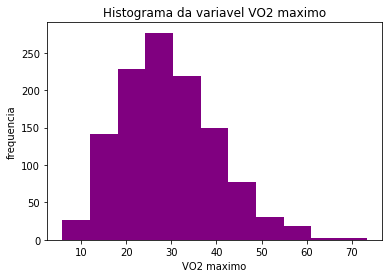

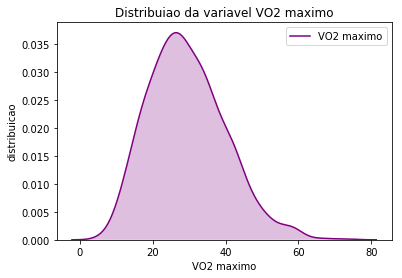

In [85]:
for i in range (0,4):
    x = Data.columns[i]
    count = Data[x].count()
    bin= 1+ 3.3* log10(count)
    plt.hist(Data[x],int(bin),color=Color[i])
    plt.title('Histograma da variavel '+x)
    plt.xlabel(x)
    plt.ylabel('frequencia')
    plt.savefig('Histograma da variavel '+x)
    plt.show()
    sns.kdeplot(Data[x],color=Color[i], shade=True)
    plt.title('Distribuicao da variavel '+x)
    plt.xlabel(x)
    plt.ylabel('distribuicao')
    plt.savefig('Distribuicao da variavel '+x)
    plt.show()
    print("\n\n")
    
    


Variavel:  Idade
Media:  53.29095563139932
Desvio Padrao:  14.746296966880656
Variancia:  217.45327423543367
Quantidade:  1172 



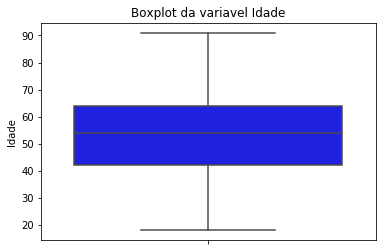




Variavel:  Peso
Media:  85.92577645051195
Desvio Padrao:  14.799113384059629
Variancia:  219.0137569542528
Quantidade:  1172 



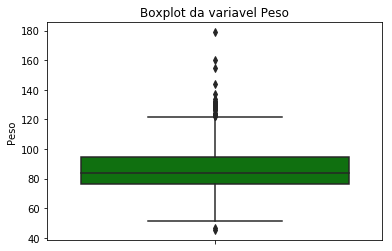




Variavel:  Carga Final
Media:  172.27150170648466
Desvio Padrao:  70.093123662472
Variancia:  4913.0459847625925
Quantidade:  1172 



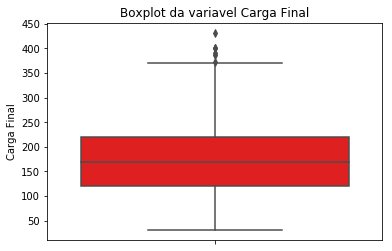




Variavel:  VO2 maximo
Media:  29.39472792315316
Desvio Padrao:  10.49724989342601
Variancia:  110.1922553250324
Quantidade:  1172 



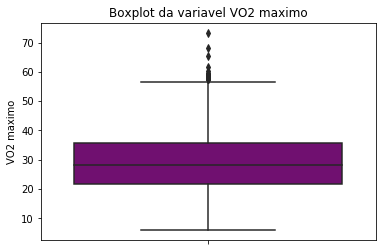

In [53]:
for i in range (0,4):
    x = Data.columns[i]
    print ("Variavel: ",x)
    print ("Media: ", Data[x].mean())
    print ("Desvio Padrao: ", Data[x].std())
    print ("Variancia: ", Data[x].var())
    print ("Quantidade: " , Data[x].count(), "\n")
    sns.boxplot(y=x,data=Data,color=Color[i])
    plt.title('Boxplot da variavel '+x)
    plt.savefig('Boxplot da variavel '+x)
    plt.show()
    print("\n\n")

Idade 

Lambda da exponencial:  0.018764910258257682 

Mu da gaussiana:  53.29095563139932
Sigma ao quadrado da gaussiana:  217.45327423543367 

Mu da lognormal:  3.932509819486875
Sigma ao quadrado da lognormal:  0.0936331955793438 



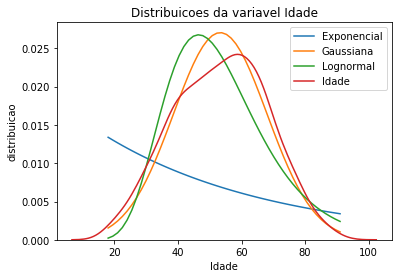




Peso 

Lambda da exponencial:  0.011637951279683105 

Mu da gaussiana:  85.92577645051195
Sigma ao quadrado da gaussiana:  219.0137569542528 

Mu da lognormal:  4.439451920143028
Sigma ao quadrado da lognormal:  0.027586997105752877 



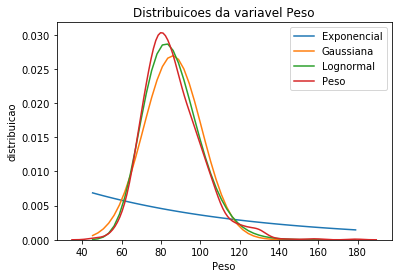




Carga Final 

Lambda da exponencial:  0.005804790636258545 

Mu da gaussiana:  172.27150170648466
Sigma ao quadrado da gaussiana:  4913.0459847625925 

Mu da lognormal:  5.0546544058509895
Sigma ao quadrado da lognormal:  0.2103368574854832 



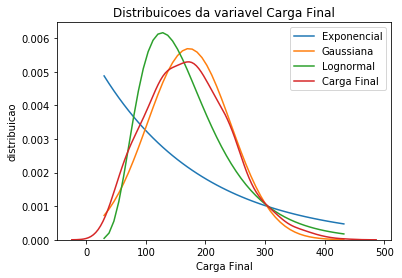




VO2 maximo 

Lambda da exponencial:  0.03401970593551017 

Mu da gaussiana:  29.39472792315316
Sigma ao quadrado da gaussiana:  110.1922553250324 

Mu da lognormal:  3.3132400746591215
Sigma ao quadrado da lognormal:  0.14364411960908474 



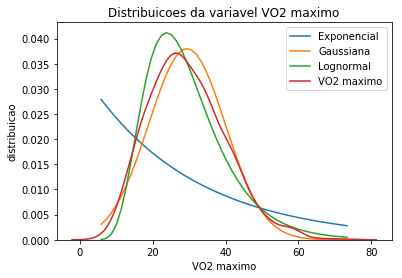

In [133]:
for i in range(0,4):
    x= Data.columns[i]
    intervalo = np.linspace(Data[x].min(),Data[x].max())
    print(x, "\n")
    
    #Exponencial
    exponencial_lambda = 1/Data[x].mean()
    exponencial= exponencial_lambda* np.exp(-(exponencial_lambda*intervalo))
    plt.plot(intervalo,exponencial, label ="Exponencial")
    print("Lambda da exponencial: ", exponencial_lambda, "\n")
    
    #gaussiana
    gaussiana_mu= Data[x].mean()
    gaussiana_sigma2=Data[x].var()
    gaussiana =(1/(np.sqrt(2*np.pi*gaussiana_sigma2)))* np.exp((-1/2)*((intervalo-gaussiana_mu)**2)/gaussiana_sigma2)
    plt.plot(intervalo, gaussiana, label="Gaussiana")
    print("Mu da gaussiana: ", gaussiana_mu)
    print("Sigma ao quadrado da gaussiana: ", gaussiana_sigma2, "\n")
    
    #lognormal

    lognormal_mu= np.sum(np.log(Data[x]))/Data[x].count()
    lognormal_sigma2= np.sum((np.log(Data[x])-lognormal_mu)**2)/Data[x].count()
    lognormal= (1/(np.sqrt(2*np.pi*lognormal_sigma2)*intervalo))* np.exp((-1/2)*((np.log(intervalo)-lognormal_mu)**2)/lognormal_sigma2)
    plt.plot(intervalo, lognormal, label="Lognormal")
    print("Mu da lognormal: ", lognormal_mu)
    print("Sigma ao quadrado da lognormal: ", lognormal_sigma2, "\n")
                             
    #weibull
    
    
    #empirica
    sns.kdeplot(Data[x])
    
    plt.title('Distribuicoes da variavel '+x)
    plt.xlabel(x)
    plt.ylabel('distribuicao')
    plt.savefig('Distribuicoes da variavel '+x)
    plt.show()
    print("\n\n")
    

Idade 



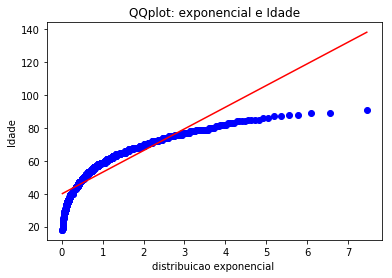

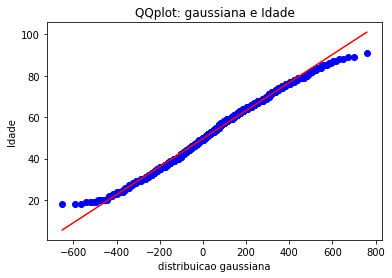

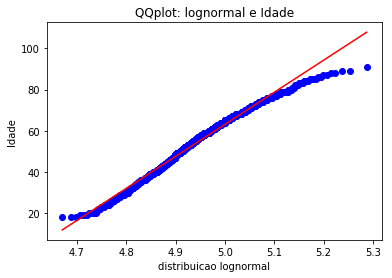




Peso 



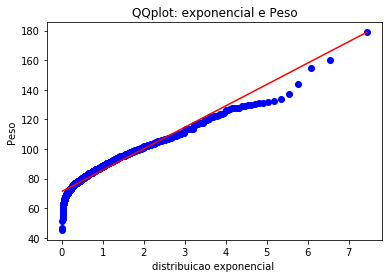

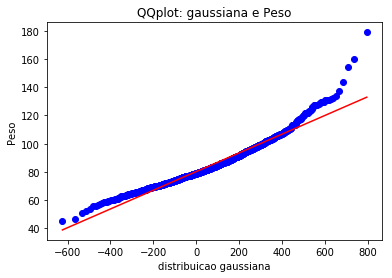

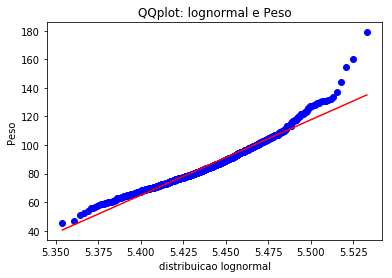




Carga Final 



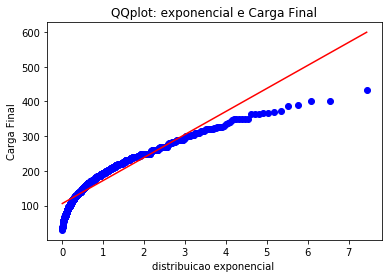

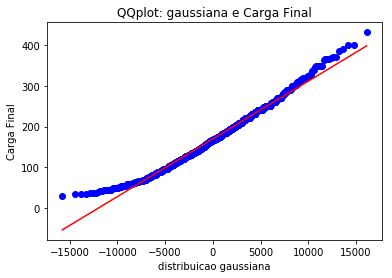

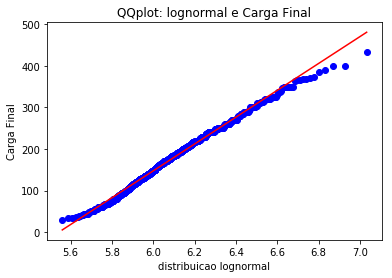




VO2 maximo 



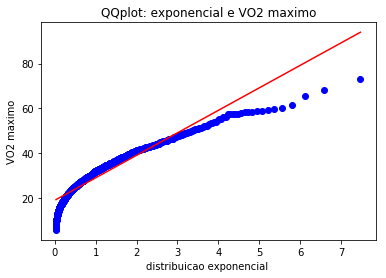

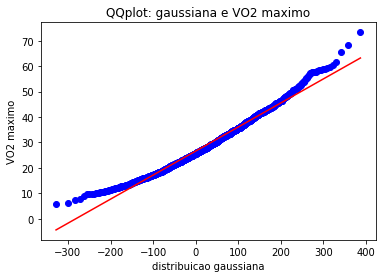

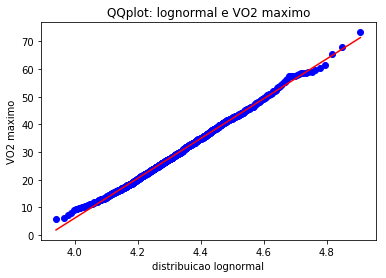

In [143]:
from scipy.stats import expon
for i in range(0,4):
    x= Data.columns[i]
    print(x, "\n")
    
    exponencial_lambda = 1/Data[x].mean()
    stats.probplot(Data[x], dist='expon',sparams=(exponencial_lambda),plot=plt)
    plt.title('QQplot: exponencial e '+x)
    plt.ylabel(x)
    plt.xlabel('distribuicao exponencial ')
    plt.savefig('QQplot: exponencial e '+x)
    plt.show()
    
    gaussiana_mu= Data[x].mean()
    gaussiana_sigma2=Data[x].var()
    stats.probplot(Data[x], dist='norm', sparams=(gaussiana_mu,gaussiana_sigma2),plot=plt)
    plt.title('QQplot: gaussiana e '+x)
    plt.ylabel(x)
    plt.xlabel('distribuicao gaussiana')
    plt.savefig('QQplot: gaussiana e '+x)
    plt.show()
    
    lognormal_mu= np.sum(np.log(Data[x]))/Data[x].count()
    lognormal_sigma2= np.sum((np.log(Data[x])-lognormal_mu)**2)/Data[x].count()
    stats.probplot(Data[x], dist='lognorm',sparams=(lognormal_sigma2, lognormal_mu),plot=plt)
    plt.title('QQplot: lognormal e '+x)
    plt.ylabel(x)
    plt.xlabel('distribuicao lognormal')
    plt.savefig('QQplot: lognormal e '+x)
    plt.show()
    
    print("\n\n")
    

Coeficiente de correlação entre  Idade  e VO2 maximo:  -0.6300720192503418


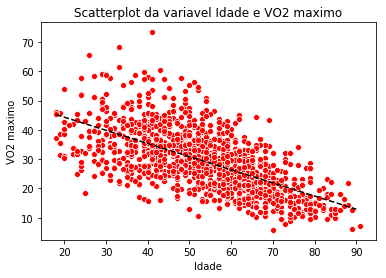

Regresao linear:  [-0.44852097 53.2968391 ]




Coeficiente de correlação entre  Peso  e VO2 maximo:  -0.17440061829630799


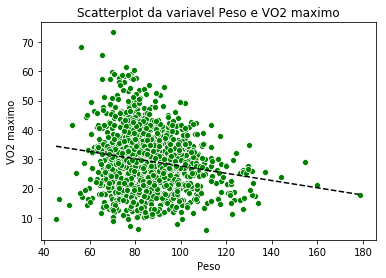

Regresao linear:  [-0.12370517 40.02419091]




Coeficiente de correlação entre  Carga Final  e VO2 maximo:  0.8783256094059619


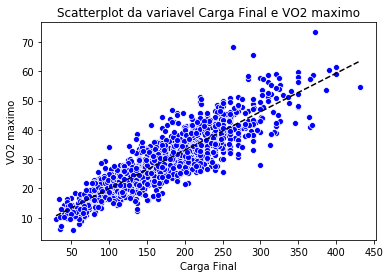

Regresao linear:  [0.13153934 6.73424783]






In [75]:
for i in range(0,3):
    x= Data.columns[i]
    Color_scatter =["Red", "Green", "Blue"]
    
    r=(np.sum((Data[x]-Data[x].mean())*(Data["VO2 maximo"]-Data["VO2 maximo"].mean())))/(np.sqrt(np.sum((Data[x]-Data[x].mean())**2))*np.sqrt(np.sum((Data["VO2 maximo"]-Data["VO2 maximo"].mean())**2)))
    print("Coeficiente de correlação entre ",x, " e VO2 maximo: ", r)
    sns.scatterplot(x=Data[x], y=Data["VO2 maximo"], color=Color_scatter[i])

    a=np.arange(Data[x].min(),Data[x].max())
    regressao_linear= np.polyfit(Data[x], Data["VO2 maximo"],1)
    plt.plot(a, regressao_linear[1] + regressao_linear[0] * a, '--', color="Black")

    plt.title('Scatterplot da variavel '+x+ " e VO2 maximo")
    plt.savefig('Scatterplot da variavel '+x+ " e VO2 maximo")
    plt.show()
    print("Regresao linear: ", regressao_linear)
    print("\n\n\n")